In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Results

In [35]:
path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/processed_results/'

# Plotting

In [36]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [37]:
def plot_curves(title, pred, metric): 
    
    df = pd.read_pickle(path + pred +'_randerr_mll_scikit_compare_' + metric + '.pkl')
    
    plt.clf()    
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)   
    ax.set_title(title, fontsize=20, pad=15)
    
    axlbls = {'MAE' : 'Negative MAE', 
              'MedAE' : 'Negative MedAE', 
              'MAPE' : 'Negative MAPE [%]',
              'Acc' : 'Accuracy Score',
              'BalAcc' : 'Balanced Accuracy Score'}
    dflbls = {'MAE' : 'Neg MAE', 
              'MedAE' : 'Neg MedAE', 
              'MAPE' : 'Neg MAPE', 
              'Acc' : 'Accuracy',
              'BalAcc' : 'Balanced Accuracy'}
    fb = {'MAE' : 'MAE Std', 
          'MAPE' : 'MAPE Std', 
          'Acc' : 'Acc CI',
          'BalAcc' : 'BalAcc CI'}
    sv_base = 'plots/randerr_compare_nuc29_'
    if 'Burnup' in title:
        axlbl = axlbls[metric] + ' [MWd/MTU]'
        sv_fig = sv_base + metric + '_burn.png'
    elif 'Reactor' in title:
        axlbl = axlbls[metric]
        sv_fig = sv_base + metric + '_rxtr.png'
    elif 'Enrichment' in title:
        axlbl = axlbls[metric] + ' [% U235]'
        sv_fig = sv_base + metric + '_enri.png'
    else:
        axlbl = axlbls[metric] + ' [days]'
        sv_fig = sv_base + metric + '_cool.png'
    ax.set_xlabel('Percent Error', fontsize=20, labelpad=15)
    ax.set_ylabel(axlbl, fontsize=20, labelpad=15) 
    
    lbls = ['kNN', 'Dec Tree', 'MLL Calc']
    dotc = ['MBrwn', 'MTeal', 'MPurp']
    fillc = ['DBrwn', 'DTeal', 'DPurp']
    mll_errs = [1, 5, 10, 15, 20]
    sk_errs = [0, 0.3, 0.7, 1, 2, 4, 6, 8, 10, 13, 17, 20]
    for i, alg in enumerate(['knn', 'dtree', 'mll']):
        if alg == 'mll':
            err = mll_errs
        else:
            err = sk_errs
        x = df.loc[err, (alg, dflbls[metric])]
        if metric == 'MedAE':
            iqr = [df.loc[err, (alg, 'IQR_25')], df.loc[err, (alg, 'IQR_75')]]
            ax.fill_between(err, iqr[0], iqr[1], color=colors[fillc[i]], alpha=0.3)
        else:
            ebar = df.loc[err, (alg, fb[metric])]
            ax.fill_between(err, x - ebar, x + ebar, color=colors[fillc[i]], alpha=0.3)
        ax.plot(err, x, 'o-', color=colors[dotc[i]], mew=0, ms=5, label=lbls[i])
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='lower left')
    
    return fig, ax, sv_fig

## Reactor Type

<Figure size 432x288 with 0 Axes>

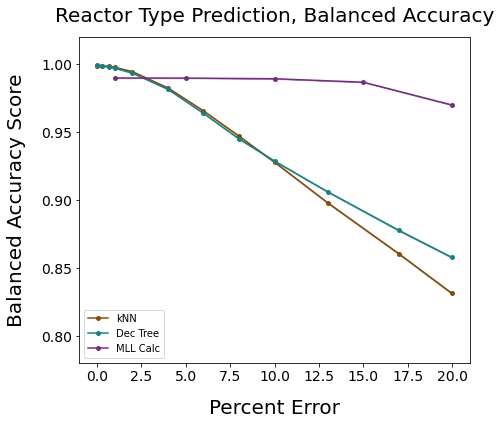

In [44]:
fig, ax, sv_fig = plot_curves('Reactor Type Prediction, Balanced Accuracy', 'reactor', 'BalAcc')
ax.set_ylim(0.78, 1.02)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

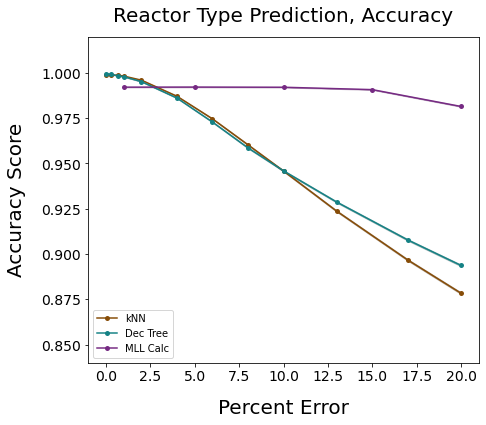

In [47]:
fig, ax, sv_fig = plot_curves('Reactor Type Prediction, Accuracy', 'reactor', 'Acc')
ax.set_ylim(0.84, 1.02)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

## Burnup

<Figure size 432x288 with 0 Axes>

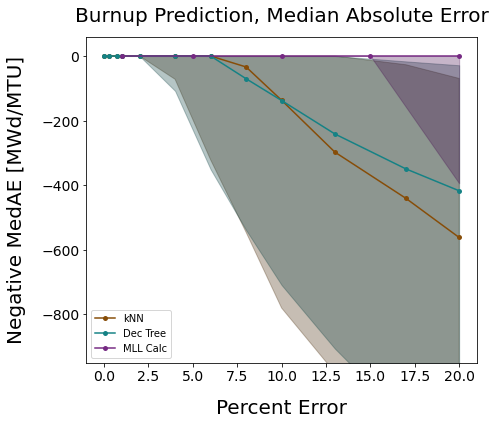

In [57]:
fig, ax, sv_fig = plot_curves('Burnup Prediction, Median Absolute Error', 'burnup', 'MedAE')
ax.set_ylim(-950, 60)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

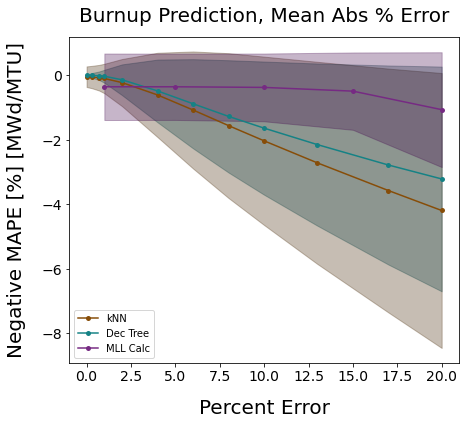

In [70]:
fig, ax, sv_fig = plot_curves('Burnup Prediction, Mean Abs % Error', 'burnup', 'MAPE')
#ax.set_ylim(None, 250)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

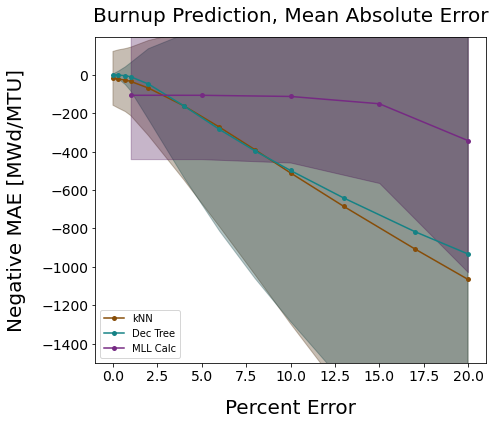

In [63]:
fig, ax, sv_fig = plot_curves('Burnup Prediction, Mean Absolute Error', 'burnup', 'MAE')
ax.set_ylim(-1500, 199)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

## Enrichment

<Figure size 432x288 with 0 Axes>

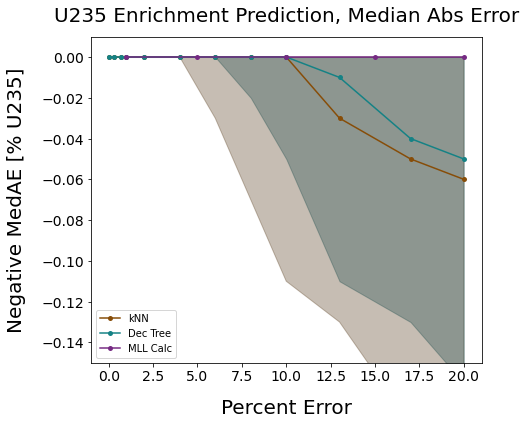

In [68]:
fig, ax, sv_fig = plot_curves('U235 Enrichment Prediction, Median Abs Error', 'enrichment', 'MedAE')
ax.set_ylim(-0.15, 0.01)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

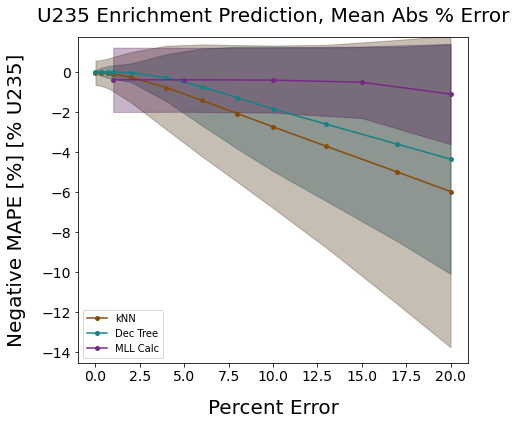

In [71]:
fig, ax, sv_fig = plot_curves('U235 Enrichment Prediction, Mean Abs % Error', 'enrichment', 'MAPE')
ax.set_ylim(None, 1.75)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

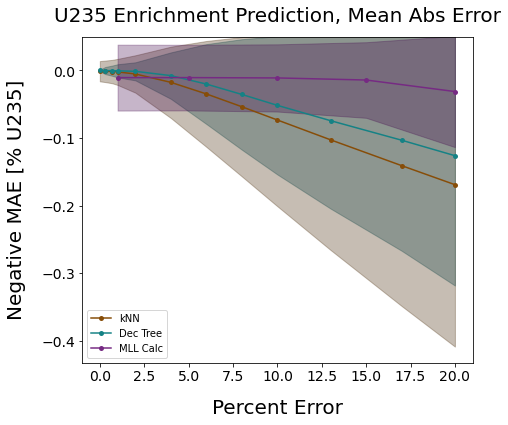

In [74]:
fig, ax, sv_fig = plot_curves('U235 Enrichment Prediction, Mean Abs Error', 'enrichment', 'MAE')
ax.set_ylim(None, 0.05)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

## Time Since Irraditation

<Figure size 432x288 with 0 Axes>

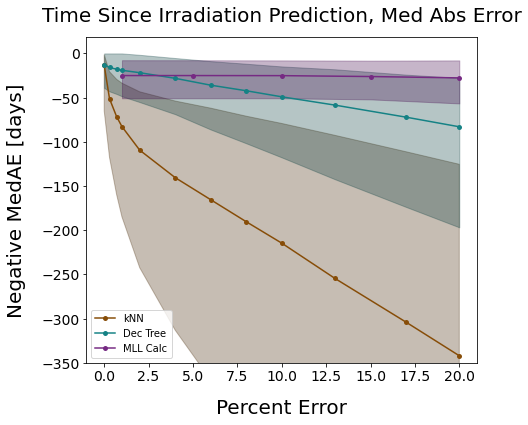

In [80]:
fig, ax, sv_fig = plot_curves('Time Since Irradiation Prediction, Med Abs Error', 'cooling', 'MedAE')
ax.set_ylim(-350, 19)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

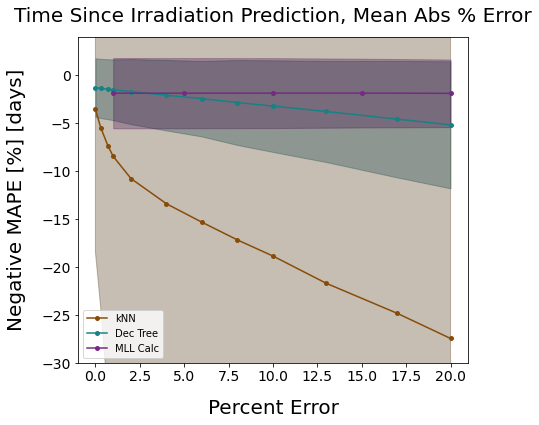

In [85]:
fig, ax, sv_fig = plot_curves('Time Since Irradiation Prediction, Mean Abs % Error', 'cooling', 'MAPE')
ax.set_ylim(-30, 4)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

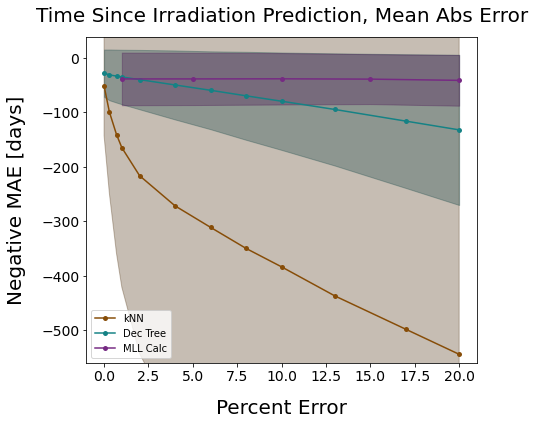

In [88]:
fig, ax, sv_fig = plot_curves('Time Since Irradiation Prediction, Mean Abs Error', 'cooling', 'MAE')
ax.set_ylim(-560, 39)
plt.show()
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)